## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
books = pd.read_csv('books_cleaned.csv')

ratings = pd.read_csv('ratings.csv')

##### We will use the ratings to train our model and based on the predicted ratings we will recommned books to the user from the books dataset.

## Splitting the data

In [36]:
inputs = ratings.drop('rating', axis = 1)
targets = ratings['rating']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 42)

We will use the test set for validation purpose only.

In [40]:
print('Shape of train inputs set: '+ str(x_train.shape))
print('Shape of train targets set: '+ str(y_train.shape))
print('Shape of test inputs set: ' + str(x_test.shape))
print('Shape of test tagets set: ' + str(y_test.shape))

Shape of train inputs set: (785404, 2)
Shape of train targets set: (785404,)
Shape of test inputs set: (196352, 2)
Shape of test tagets set: (196352,)


### Basic overview of the architecture

The Neural Network architecture we’re going to create will have two input embedding layers. The first embedding layer accepts the books, and the second the users. These two embeddings are trained separately and then combined together before being passed to a dense layer.




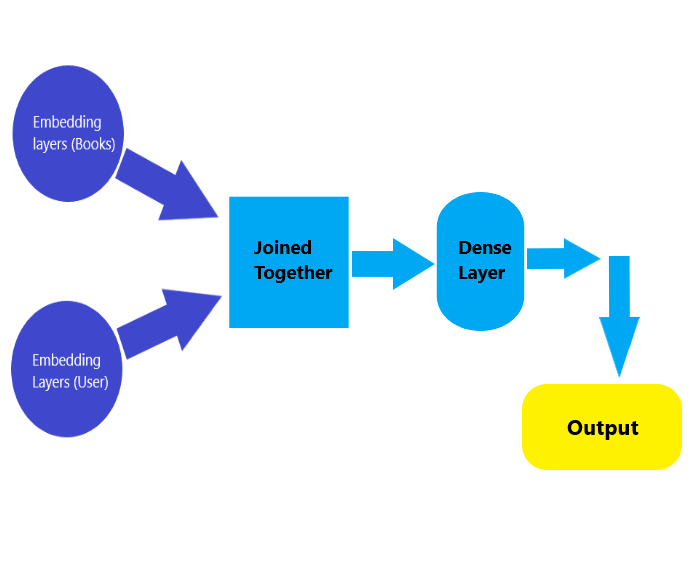

#### We will create seperate embedding layers for the two and then concatenate them, pass them through a dense layer and finally an output layer that will predict a single rating.

Let's grab the no. of unique book_id and user_id from the ratings dataset

In [15]:
#nunique() will return the total number of unique items

book_id = ratings.book_id.nunique() 

user_id = ratings.user_id.nunique()

In [20]:
print('Total books: ' + str(book_id))
print('Total users: ' + str(user_id))

Total books: 10000
Total users: 53424


######  

## Model building

In [28]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [25]:
#Embedding layer for books

books_input = Input(shape = [1]) #1st input layer
embedding_layer_books = Embedding(book_id + 1,20)(books_input) #Embedding layer
embedding_output_books = Flatten()(embedding_layer_books) #Output layer 

#Embedding layer for users

users_input = Input(shape = [1])#1st input layer
embedding_layer_users = Embedding(user_id + 1,20)(users_input)
embedding_output_users = Flatten()(embedding_layer_users) #Output layer 


**Note:** We are appending the input layers on top of embedding layers. This is an action of functional API. It basically means that the outputs of those input layers is passed on to the embedding layers.

In [33]:
#Concatination and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users]) #Joining the outputs of the two embedding layers

hidden_layer = Dense(128, activation='relu')(joining_layer)

output = Dense(1)(hidden_layer)

model = tf.keras.Model([books_input, users_input], output)

**Note:** Here also we passed the output of the joining layer to the hidden dense layer, output of the hidden layer to the final output layer. 

In [34]:
#Model compilation

optimizers = Adam(lr = 0.01)#Using a custom learning rate

model.compile(optimizer=optimizers, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 20)        200020      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 20)        1068500     input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
sfsdfsdfds

In [ ]:
#Training model

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    batch_size = 64, #Setting a lower batch size for faster training
    epochs = 15,
    callbacks = [early_stopping],
    validation_data = [x_test, y_test],
    verbose = 1
    
)